# Prediksi Gender Berdasarkan Nama

Data Understanding

Sumber Data
Dataset diambil dari link berikut:

🔗 https://archive.ics.uci.edu/dataset/591/gender+by+name

Dataset ini berasal dari UCI Machine Learning Repository dan berisi informasi mengenai nama depan serta distribusi gendernya berdasarkan data penduduk dari Amerika Serikat, Kanada, Inggris, dan Australia. Data ini telah dikumpulkan dan dirilis untuk keperluan riset klasifikasi nama.

Tujuan

Tujuan dari analisis ini adalah untuk mengembangkan model prediktif yang dapat menentukan gender (laki-laki atau perempuan) berdasarkan nama depan seseorang. Model ini nantinya dapat digunakan dalam berbagai aplikasi praktis, seperti:

Preprocessing data pengguna

Penyesuaian konten atau layanan

Pelengkap atribut dalam data demografis

In [1]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
gender_by_name = fetch_ucirepo(id=591)

# data (as pandas dataframes)
X = gender_by_name.data.features
y = gender_by_name.data.targets

## data (as pandas dataframes)
data = gender_by_name.data.original
  # menyimpan hasil komputasi ke dalam csv
data.to_csv("gender_by_name.data.csv", index=True)
print(data.info()) #untuk menampilkan info fitur-fitur yang ada di tabel

print(data.head()) #untuk menampilkan 5 baris pertama

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147269 entries, 0 to 147268
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Name         147269 non-null  object 
 1   Gender       147269 non-null  object 
 2   Count        147269 non-null  int64  
 3   Probability  147269 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.5+ MB
None
      Name Gender    Count  Probability
0    James      M  5304407     0.014517
1     John      M  5260831     0.014398
2   Robert      M  4970386     0.013603
3  Michael      M  4579950     0.012534
4  William      M  4226608     0.011567


In [4]:
display(data) #display dataset

,Name,Gender,Count,Probability
0,James,M,5304407,1.451679e-02
1,John,M,5260831,1.439753e-02
2,Robert,M,4970386,1.360266e-02
3,Michael,M,4579950,1.253414e-02
4,William,M,4226608,1.156713e-02
...,...,...,...,...
147264,Zylenn,M,1,2.736740e-09
147265,Zymeon,M,1,2.736740e-09
147266,Zyndel,M,1,2.736740e-09
147267,Zyshan,M,1,2.736740e-09


# Eksplorasi Data

In [8]:
data.shape #untuk mengetahui bentuk dataset(baris & kolom)

(147269, 5)

In [9]:
data.columns #untuk mengetahui kolom-kolom yang ada pada dataset

Index(['Unnamed: 0', 'Name', 'Gender', 'Count', 'Probability'], dtype='object')

In [10]:
data.dtypes #untuk mengetahui tipe data dari masing-masing kolom

,0
Unnamed: 0,int64
Name,object
Gender,object
Count,int64
Probability,float64


# missin values

In [23]:
import pandas as pd

# Asumsikan data sudah dimuat ke dalam variabel `data`
# (Jika belum, bisa pakai ucimlrepo seperti sebelumnya)

# 1. Deteksi baris yang memiliki missing value
rows_with_missing = data[data.isnull().any(axis=1)]

# 2. Tampilkan baris yang memiliki nilai kosong
print("Rows with Missing Values:")
print(rows_with_missing)

# 3. Deteksi missing value per sel
missing_values = data.isnull()

# 4. Hitung jumlah missing value di setiap kolom
missing_counts = missing_values.sum()

# 5. Tampilkan total missing value per kolom
print("\nMissing Value Counts:")
print(missing_counts)

# 6. Tampilkan total keseluruhan missing value (opsional)
print(f"\nTotal Missing Values in Dataset: {missing_counts.sum()}")

Rows with Missing Values:
Empty DataFrame
Columns: [Name, Gender, Count, Probability]
Index: []

Missing Value Counts:
Name           0
Gender         0
Count          0
Probability    0
dtype: int64

Total Missing Values in Dataset: 0


# Data Outlier atau tidak

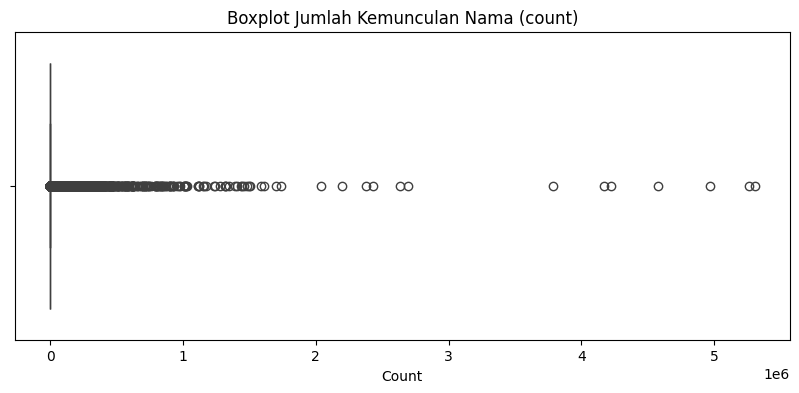

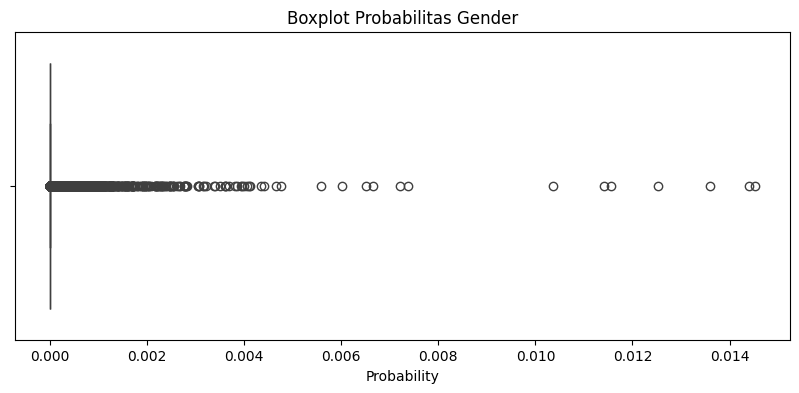

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot untuk kolom 'count'
plt.figure(figsize=(10, 4))
sns.boxplot(x=data['Count'])
plt.title('Boxplot Jumlah Kemunculan Nama (count)')
plt.xlabel('Count')
plt.show()

# Boxplot untuk kolom 'probability'
plt.figure(figsize=(10, 4))
sns.boxplot(x=data['Probability'])
plt.title('Boxplot Probabilitas Gender')
plt.xlabel('Probability')
plt.show()


# Visualisasi

<Figure size 1200x1000 with 0 Axes>

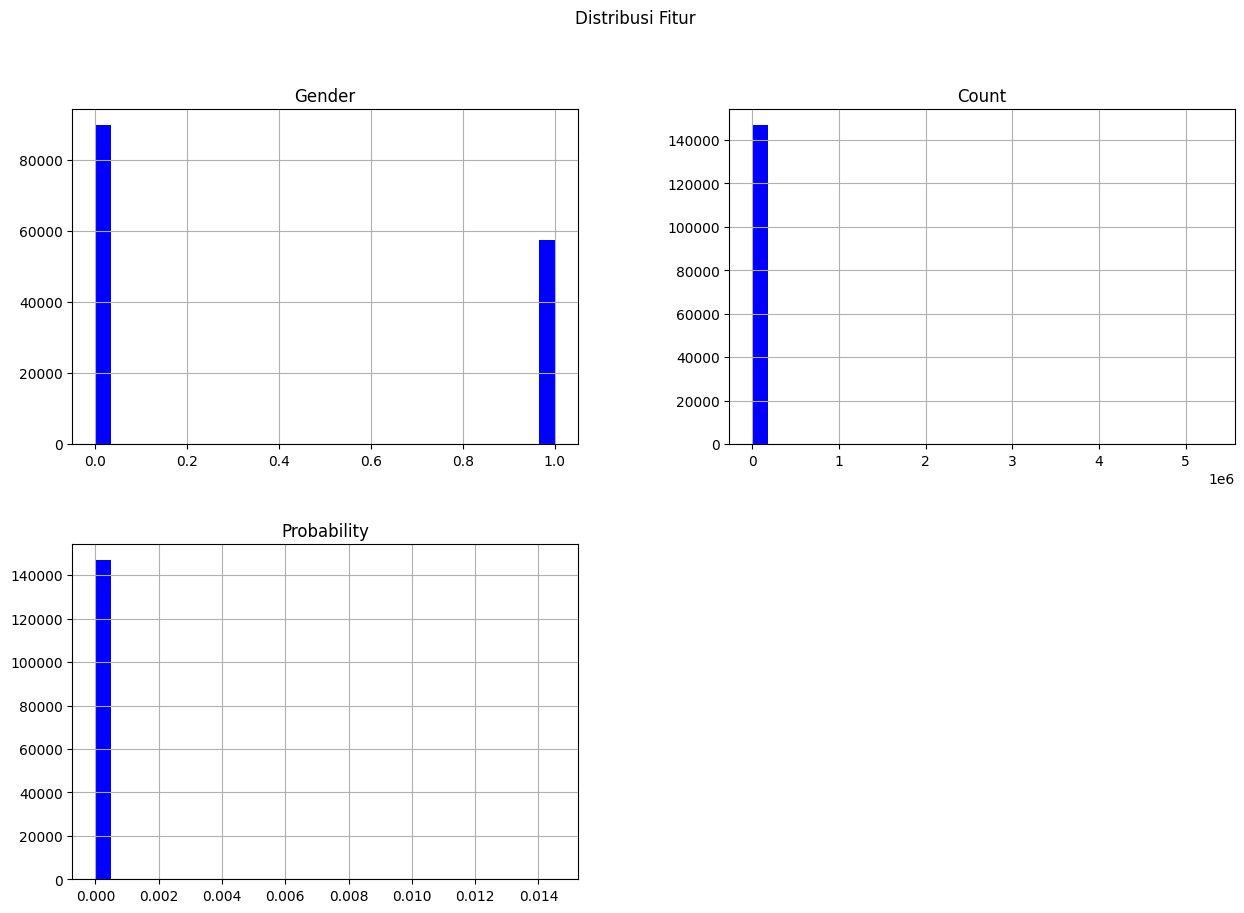

In [24]:
# Visualisasi distribusi fitur dengan histogram
plt.figure(figsize=(12, 10))
data.hist(bins=30, figsize=(15, 10), color='blue')
plt.suptitle('Distribusi Fitur')
plt.show()

# sebelum Preprocessing

In [16]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Ambil dataset Gender by Name dari UCI (ID: 591)
gender_data = fetch_ucirepo(id=591)

# Ambil data sebagai DataFrame
data = gender_data.data.original

# Tampilkan 20 baris pertama sebelum preprocessing
print("Sebelum Preprocessing:")
print(data.head(20))

Sebelum Preprocessing:
           Name Gender    Count  Probability
0         James      M  5304407     0.014517
1          John      M  5260831     0.014398
2        Robert      M  4970386     0.013603
3       Michael      M  4579950     0.012534
4       William      M  4226608     0.011567
5          Mary      F  4169663     0.011411
6         David      M  3787547     0.010366
7        Joseph      M  2695970     0.007378
8       Richard      M  2638187     0.007220
9       Charles      M  2433540     0.006660
10       Thomas      M  2381034     0.006516
11  Christopher      M  2196198     0.006010
12       Daniel      M  2039641     0.005582
13      Matthew      M  1738699     0.004758
14    Elizabeth      F  1704140     0.004664
15     Patricia      F  1608260     0.004401
16     Jennifer      F  1584426     0.004336
17      Anthony      M  1506437     0.004123
18       George      M  1495736     0.004093
19        Linda      F  1480592     0.004052


# Preprocessing

In [25]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Asumsikan dataset sudah diambil dari UCI
from ucimlrepo import fetch_ucirepo
gender_data = fetch_ucirepo(id=591)
data = gender_data.data.original

# ---------------- PREPROCESSING ---------------- #

# 1. Ubah ke huruf kecil dan hapus karakter non-alfabet
data['Name'] = data['Name'].str.lower().str.replace(r'[^a-z]', '', regex=True)

# 2. Encode label gender (M = 1, F = 0)
data['Gender'] = data['Gender'].map({'M': 1, 'F': 0})

# 3. Drop baris yang memiliki missing value (jika ada)
data = data.dropna()

# 4. TF-IDF Vectorizer (fitur berbasis karakter n-gram)
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(2, 4))
X = vectorizer.fit_transform(data['Name'])  # fitur
y = data['Gender']                         # label

# Modeling: Klasifikasi dengan Naive Bayes

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Buat dan latih model Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# 3. Prediksi
y_pred = model.predict(X_test)

# 4. Evaluasi
print("=== Akurasi ===")
print(accuracy_score(y_test, y_pred))

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=['Perempuan', 'Laki-laki']))

print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))


=== Akurasi ===
0.7303931554288042

=== Classification Report ===
              precision    recall  f1-score   support

   Perempuan       0.74      0.85      0.79     18029
   Laki-laki       0.70      0.54      0.61     11425

    accuracy                           0.73     29454
   macro avg       0.72      0.70      0.70     29454
weighted avg       0.73      0.73      0.72     29454


=== Confusion Matrix ===
[[15339  2690]
 [ 5251  6174]]


# percobaan dengan data baru

In [27]:
nama_baru = ['rahel', 'alex', 'indah', 'david']
X_new = vectorizer.transform(nama_baru)
prediksi = model.predict(X_new)

for nama, hasil in zip(nama_baru, prediksi):
    print(f"{nama} → {'Laki-laki' if hasil == 1 else 'Perempuan'}")

rahel → Perempuan
alex → Perempuan
indah → Perempuan
david → Laki-laki


# Evaluasi model tersebut

Accuracy: 0.7304

Classification Report:
              precision    recall  f1-score   support

   Perempuan       0.74      0.85      0.79     18029
   Laki-laki       0.70      0.54      0.61     11425

    accuracy                           0.73     29454
   macro avg       0.72      0.70      0.70     29454
weighted avg       0.73      0.73      0.72     29454



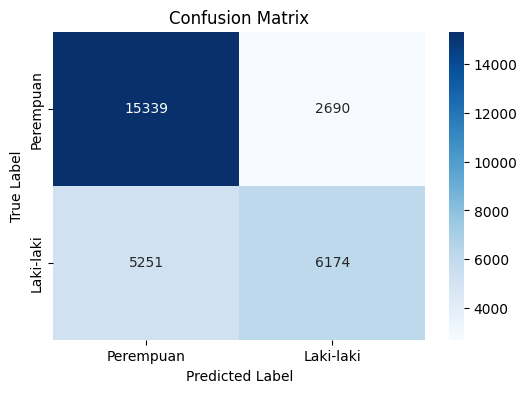

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Akurasi
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# 2. Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Perempuan", "Laki-laki"]))

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Perempuan", "Laki-laki"],
            yticklabels=["Perempuan", "Laki-laki"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
